In [25]:
import pandas as pd
import cdt
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
# read data
df = pd.read_csv('../../data/session-df-ak.csv')
#df = pd.read_csv('../../data/training_set/log_mini.csv')
#df = pickle.load( open( "../../data/df_causal_discovery.p", "rb") )

In [55]:
df.columns

Index(['Unnamed: 0', 'session_id', 'session_position', 'session_length',
       'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'skip', 'custom_skip', 'pause_before_play', 'custom_pause_before_play'],
      dtype='object')

In [56]:
cols1 = ['custom_skip', 'hour_of_day', 'session_position', 'premium', 'session_length'] # , 'custom_pause_before_play'
df1 = df[cols1]
for col in cols1:
    df1[col] = df1[col].astype(int)

# cols2 = ['custom_skip', 'hour_of_day', 'session_position', 'premium', 'no_pause_before_play']
# df2 = df[cols2]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


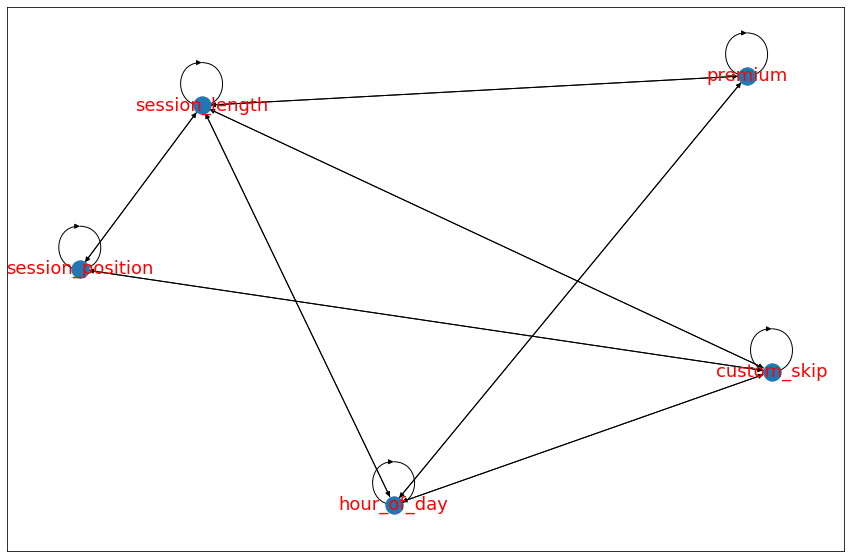

In [57]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to data
skeleton = glasso.predict(df1)# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

PC is ran on the skeleton of the given graph.


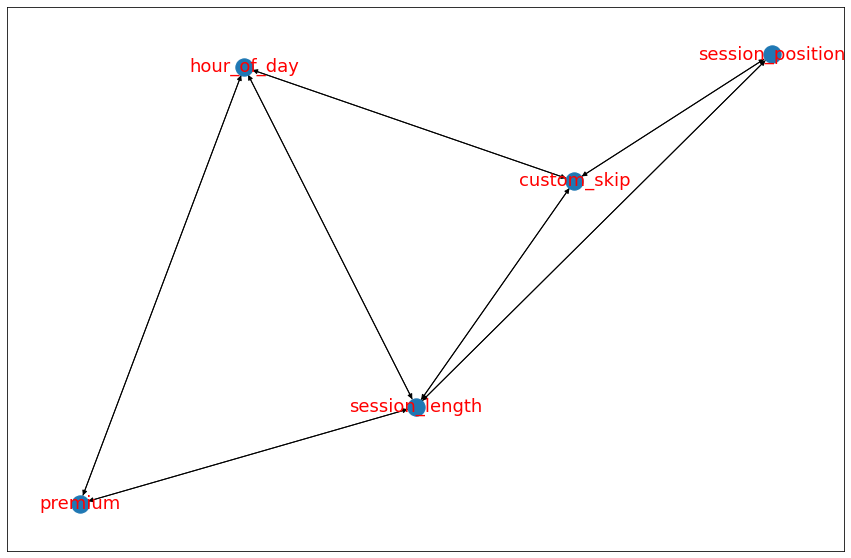

In [58]:
# Use causal discovery to get causal models# PC algorithm
model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(df1, skeleton)


# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

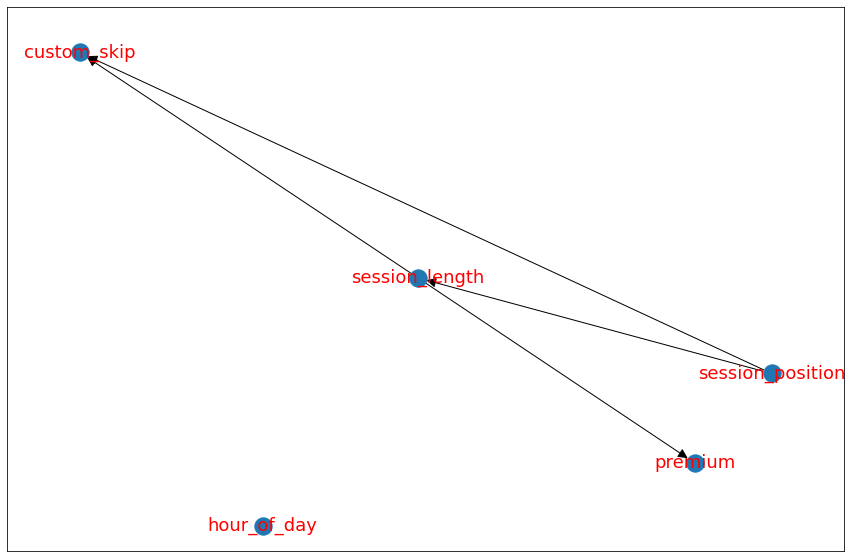

In [60]:
# Use causal discovery to get causal models# PC algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_pc = model_lingam.predict(df1)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r', arrowsize=20)